# Argentina

maximice la ganancia total a ser obtenida.

calcular la ganancia hay que sumar los ingresos por los recitales y restar los costos de traslado.

DATOS: el codigo de la cuidad, su latitud y longitud sobre la esfera terrestre, la poblacion de la ciudad y los códigos de las otras cuidades con las cuales está conectada.

9 pesos por habitante.
costo de traslado entre 2 ciudades se puede calcular como
	la cantidad de kilometros entre las 2 ciudades por 2500 pesos/kilómetro.

Para calcular la distancia entre dos ciudades se supone que los viajes serán en linea recta sobre la superficie de la tierra suponiéndola una esfera perfecta de 6371 km de rádio.

Por último se sabe que solo se pueden hacer recorridos por las rutas establecidas, pudiendo pasar por conexiones donde la banda no de recital. Por ejemplo si hay una ruta de A a B y otra ruta de B a C. La banda puede viajar desde A, pasando por B para llegar a C. Por mas que no se detenga en B a dar un recital.

Obligando de esta forma que la recaudación en cada recital sea una secuencia estrictamente creciente.


Se solicita como resultado obtener la ganancia máxima que pueda ser obtenida, seleccionando cuidadosamente las ciudades y rutas.

Como input se debe utilizar el archivo adjunto. Donde en la primer linea se tiene un número que indica la cantidad de ciudades, seguido de la recaudación a ser obtenida por cada habitante de la ciudad, seguido por el costo del kilometro de transporte. Las siguientes lineas tendrán cada una de las ciudades con el codigo de la ciudad, latitud, longitud, poblacion, y las ciudades con las cuales existe una ruta.

Para el correcto cálculo del resultado, apenas se obtenga el largo de una ruta, este debe ser redondeado a kilómetros.


In [198]:
import numpy as np
import matplotlib.pyplot as plt

from busqueda_local import hill_climb
from busqueda_local import simulated_annealing
from deap import base, creator, tools, algorithms

# ACA LA POSTA

In [199]:
NUMCIUDADES = 1047
gananciaPorH = 9
costoPorKm = 2500

In [200]:
info = open('info.txt', 'r').read().split("\n")

#### Defino las ciudades en array

In [201]:
data = [None] * NUMCIUDADES
CITYs = np.zeros([NUMCIUDADES,4],dtype="|S8")

for i in range(0,len(info)):
    data[i] = info[i].split(' ')
    for j in range(0,4):
        CITYs[i][j] = data[i][j]

In [203]:
## nombre, lat, lon, habitantes
CITYs

array([['IN0488', '13.1', '80.29', '5745532'],
       ['IT0557', '45.07', '7.67', '1258632'],
       ['RU0808', '56.014', '92.866', '613605'],
       ..., 
       ['CF0108', '4.367', '18.558', '727348'],
       ['VN1034', '10.97', '106.83', '652646'],
       ['JP0577', '34.986', '138.385', '686446']], 
      dtype='|S8')

## DISTANCIAAAAA

In [204]:
from math import radians, cos, sin, asin, sqrt

## Espera un array formato [nombre, lat, lon, habitantes] como city1 y city2

def distancia(city1,city2):
    # approximate radius of earth in km
    R = 6371.0
    lat1 = float(city1[1])
    lon1 = float(city1[2])
    lat2 = float(city2[1])
    lon2 = float(city2[2])
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = R * c
    return np.around(km)

In [205]:
asdasd = [['AR0021','-34.603','-58.398','11862073','AR0019','AR0017'],
['AR0019','-38.0','-57.58','554916','AR0021']]

In [206]:
distancia(asdasd[0],asdasd[1])

385.0

In [210]:
def pos(nombre):
    for i in range(0,len(CITYs[:,:1])):
        if (CITYs[:,:1][i] == nombre):
            return i

## Nuevos

In [211]:
def nuevos():
    a=np.array(CITYs[:,:1])
    n = 0;
    while (n == 0):
        np.random.shuffle(a)
        win = 0
        c1 = []
        c2 = []
        for i in range(0, len(a)-1):
            c1 = data[pos(a[i])]
            c2 = data[pos(a[i+1])]
            if c2[3]*gananciaPorH > c1[3]*gananciaPorH:
                 n = 1
            else:
                n = 0
    return a

In [212]:
nuevos()

array([['US1000'],
       ['NG0707'],
       ['IN0467'],
       ..., 
       ['CN0144'],
       ['CN0266'],
       ['US0973']], 
      dtype='|S8')

In [139]:
sorted=[[945,400000],[188,400249],[778,400629],[1019,400828],[793,401697],[889,402908],[546,403064],[661,403226],[943,403489],[327,403874],[265,404710],[384,404901],[414,405304],[42,405494],[269,406912],[410,407322],[743,407848],[942,408068],[326,408245],[68,408554],[255,408931],[892,409042],[7,412100],[838,412678],[111,413056],[329,413568],[712,414504],[744,415000],[982,415000],[979,415074],[863,415156],[824,416435],[918,417137],[989,417211],[713,417356],[785,417527],[608,417767],[22,418000],[687,419567],[952,420384],[239,420585],[719,420594],[692,420984],[819,422830],[361,423026],[112,423039],[258,423251],[425,423692],[238,424787],[372,425716],[636,425898],[847,426510],[108,427272],[984,428411],[684,429694],[131,429954],[655,431408],[62,431966],[246,432149],[734,433782],[762,433892],[956,434782],[220,434969],[436,435266],[691,436094],[276,436780],[457,437138],[174,437710],[1043,437802],[260,438667],[92,438706],[150,439232],[109,439664],[208,439712],[486,439796],[752,439886],[554,440150],[405,440388],[772,441231],[388,443112],[229,443604],[99,444028],[476,444779],[485,446260],[544,446298],[311,446749],[528,448174],[114,449167],[909,449194],[870,449258],[355,449498],[447,451007],[596,451155],[703,451394],[1032,451690],[248,451924],[289,456304],[449,456356],[379,456368],[365,457410],[612,458283],[418,458997],[471,459178],[985,459200],[256,459866],[795,460273],[122,460952],[271,461086],[1040,461734],[450,463449],[181,463873],[746,464599],[373,464622],[465,464764],[340,465372],[717,465973],[757,466067],[876,466180],[698,466661],[840,469217],[228,469344],[18,469579],[617,470378],[665,470474],[183,470684],[1013,471020],[999,471152],[727,471950],[753,472070],[435,472180],[204,472338],[328,472571],[961,472803],[76,472871],[581,473694],[634,473719],[331,473871],[125,475016],[790,477244],[132,477396],[232,477460],[6,478224],[716,479156],[653,479652],[90,481654],[755,482000],[212,482365],[748,482546],[374,482908],[308,483129],[479,483177],[16,484286],[789,484488],[29,484646],[391,484862],[1021,484873],[484,485348],[874,485898],[235,485962],[534,486802],[830,486950],[975,488506],[226,489022],[133,489452],[971,489725],[644,490221],[40,490644],[352,491943],[783,492120],[750,492498],[442,493092],[287,493294],[481,493364],[292,495756],[660,496035],[197,496834],[566,497556],[880,498230],[321,499807],[767,500000],[811,500258],[190,500318],[448,500464],[615,500964],[113,501704],[87,502144],[1002,502373],[1004,503368],[106,504326],[924,504434],[25,505093],[130,505240],[456,507196],[736,509390],[685,509790],[512,509961],[224,511151],[827,514426],[304,515574],[302,517422],[475,518510],[221,518694],[845,520000],[628,520704],[788,520774],[837,520940],[473,521046],[799,523314],[144,523750],[253,524692],[885,524698],[143,525089],[677,526470],[285,527428],[430,527638],[74,527681],[497,528811],[922,530326],[325,530577],[416,530756],[992,530820],[19,532419],[237,533283],[279,536092],[257,537191],[626,537534],[301,537685],[299,537964],[387,539382],[182,539536],[686,539715],[562,540247],[296,540768],[948,541081],[632,542603],[623,543095],[567,544738],[857,545108],[236,545616],[647,546922],[699,547272],[341,548572],[853,548702],[843,548956],[603,550864],[590,551443],[887,552184],[731,552607],[488,553948],[366,554373],[927,554730],[643,554916],[153,555052],[531,555308],[589,555694],[1034,556518],[522,557017],[342,558808],[696,558814],[222,561072],[126,561932],[640,562216],[64,562412],[83,562706],[261,562998],[1041,563103],[741,565650],[398,566297],[460,567289],[543,568700],[211,568783],[937,569134],[794,569711],[343,569734],[14,571154],[66,571554],[270,571644],[385,572013],[421,572056],[394,572325],[614,572555],[963,572977],[932,573638],[118,573722],[797,575434],[396,576386],[693,577307],[621,577416],[411,578352],[812,578545],[519,578808],[81,578828],[964,579399],[1007,580000],[390,581861],[154,582044],[166,582778],[107,584778],[69,584877],[198,586210],[708,586617],[521,587084],[20,587136],[541,587766],[673,588206],[611,588462],[858,591145],[11,591552],[444,592366],[900,594065],[861,594605],[451,595064],[250,595670],[192,595820],[962,597010],[586,597174],[569,597915],[376,599142],[318,599600],[278,600468],[715,600778],[622,601192],[362,601214],[316,602440],[252,603144],[564,603688],[402,603750],[168,609472],[213,611230],[1037,611572],[186,611739],[917,612356],[658,612776],[2,613605],[897,613871],[737,614273],[360,614370],[764,615312],[97,617529],[439,618270],[925,618552],[532,618815],[775,619710],[233,620500],[100,620501],[749,620898],[520,621666],[104,622471],[572,624724],[681,627610],[306,628284],[412,632810],[363,634318],[929,635705],[408,636164],[576,636660],[36,637742],[375,639150],[510,639972],[467,640028],[875,640586],[21,642862],[966,643034],[720,645000],[136,645336],[61,645916],[33,646322],[735,646750],[54,647778],[886,648020],[438,648622],[911,649884],[721,652150],[664,652604],[1045,652646],[393,652841],[949,653824],[3,654318],[347,655738],[730,655920],[89,656227],[921,657614],[286,657646],[860,657834],[879,658318],[189,658331],[45,658762],[134,659554],[152,660475],[367,660779],[158,662064],[771,662174],[35,662373],[494,662816],[871,663726],[37,666322],[274,666562],[781,669144],[1018,669434],[680,670142],[383,670954],[72,674246],[210,674508],[813,675522],[277,675862],[513,678804],[120,679286],[88,679948],[591,681214],[582,683064],[489,683111],[505,683860],[13,684380],[1046,686446],[77,687270],[162,687723],[78,688090],[172,688862],[31,689902],[381,690299],[792,690800],[151,693080],[754,694466],[459,694660],[671,695110],[148,695322],[315,695734],[553,696461],[711,697096],[619,699328],[682,700180],[348,701742],[915,701772],[511,703468],[802,703926],[908,704230],[259,705218],[413,706000],[983,706717],[803,707500],[639,707883],[1033,710738],[901,710746],[50,715600],[59,716192],[195,717904],[852,718680],[970,719208],[607,719420],[593,721772],[652,721992],[217,723802],[968,724865],[1016,725723],[272,726292],[509,727050],[1044,727348],[714,729525],[759,730587],[230,732818],[601,735324],[524,736138],[545,737068],[115,740945],[842,742414],[1017,742414],[119,743276],[320,744308],[592,746860],[403,750634],[928,750838],[245,750986],[515,751018],[760,751182],[525,752032],[738,752872],[339,753844],[201,754070],[675,754836],[135,755066],[516,755525],[994,758000],[923,759162],[833,759510],[722,760842],[678,762218],[960,763506],[864,763590],[972,765978],[23,767588],[809,771000],[588,774340],[826,775301],[291,775785],[571,775858],[314,777304],[633,777498],[672,778985],[65,779104],[200,780134],[12,781218],[768,784774],[679,785174],[538,786232],[941,786392],[5,789992],[773,790410],[733,791000],[491,793316],[526,795044],[916,795757],[283,795870],[267,796301],[606,800000],[358,801336],[440,801600],[52,801828],[240,802630],[128,802820],[548,803122],[424,803442],[426,804138],[993,806000],[55,806626],[810,806652],[382,806817],[161,811827],[70,814586],[594,816286],[91,818164],[907,818176],[49,820089],[415,820606],[649,823300],[501,823572],[705,825698],[913,826000],[298,827306],[690,827815],[142,828313],[654,828896],[668,830068],[981,830527],[53,834033],[973,834064],[165,834852],[43,835194],[441,836728],[605,838744],[164,839000],[895,840834],[846,841088],[310,841402],[429,842890],[723,843678],[856,844583],[262,844584],[454,847500],[493,847676],[169,849000],[872,851802],[986,855648],[27,859000],[167,861824],[905,863242],[774,866000],[930,866000],[829,869068],[823,869076],[244,870000],[710,872000],[288,874138],[173,874385],[776,877476],[507,877656],[423,881187],[517,881359],[1030,881801],[48,881964],[904,882381],[336,882822],[155,885134],[818,885196],[73,886256],[638,886318],[869,887000],[556,887242],[1042,887801],[919,890202],[641,894679],[47,895000],[902,897480],[332,897703],[231,898424],[535,899966],[290,903000],[461,904954],[254,906196],[663,907766],[160,908020],[555,909615],[305,913331],[906,915150],[732,917934],[958,918572],[335,919684],[893,920000],[401,922422],[891,922800],[991,923933],[694,924154],[495,925000],[587,925522],[105,929013],[357,929682],[241,930229],[502,933478],[170,935758],[28,937875],[354,940846],[523,943262],[751,943534],[490,943574],[124,945227],[706,946686],[950,947658],[506,948244],[859,949424],[1012,952016],[969,953044],[635,953862],[32,954958],[268,955272],[903,957533],[462,958169],[116,958238],[496,962656],[539,962745],[110,967109],[281,969378],[350,971191],[26,973690],[899,973866],[987,978564],[700,980588],[95,982000],[422,983446],[303,983590],[1023,983698],[1028,986000],[149,986968],[263,987694],[570,990286],[15,990677],[146,992062],[280,992228],[758,993390],[577,993920],[990,996595],[835,1000121],[380,1000216],[855,1001193],[293,1003418],[10,1005794],[333,1006427],[156,1007000],[873,1008328],[157,1009056],[127,1009469],[1039,1010000],[345,1011932],[468,1012661],[761,1013635],[656,1013988],[205,1018440],[801,1018802],[242,1020000],[478,1023000],[770,1025000],[657,1029914],[620,1032324],[93,1032567],[129,1034690],[370,1035949],[967,1051326],[404,1052628],[79,1057928],[175,1060000],[536,1060202],[46,1061532],[417,1061848],[1027,1064720],[464,1078000],[8,1078436],[184,1081499],[1009,1084880],[159,1085000],[533,1089202],[878,1090655],[323,1090830],[368,1094784],[814,1096256],[782,1097000],[432,1097406],[988,1097742],[98,1097766],[955,1099000],[808,1100850],[602,1101954],[472,1103782],[369,1104642],[243,1113895],[765,1114317],[191,1126000],[551,1137219],[434,1138009],[798,1150717],[707,1152225],[877,1157584],[645,1157802],[828,1164332],[920,1167000],[67,1169757],[194,1174964],[218,1176334],[24,1179941],[216,1191296],[868,1201400],[742,1206108],[123,1207756],[247,1209199],[849,1213100],[977,1216134],[17,1217715],[839,1228467],[974,1229664],[433,1239328],[662,1240000],[724,1245445],[729,1246463],[140,1249196],[177,1250238],[275,1258174],[807,1258202],[1,1258632],[745,1258654],[1024,1259445],[597,1259958],[959,1260886],[547,1261682],[1022,1262000],[185,1267696],[307,1270096],[940,1270488],[616,1281472],[910,1285848],[477,1296089],[938,1297720],[334,1301313],[756,1304713],[926,1307252],[627,1310592],[346,1312758],[406,1318806],[1010,1319156],[427,1319232],[650,1321434],[725,1327912],[565,1328000],[777,1335794],[452,1337587],[894,1338000],[41,1338064],[980,1342042],[102,1343000],[574,1354312],[121,1364905],[609,1369624],[832,1372026],[995,1374468],[728,1381011],[610,1381248],[1005,1386594],[583,1393176],[85,1394000],[295,1395640],[178,1408228],[338,1411656],[455,1411944],[804,1417666],[598,1419138],[1036,1422665],[284,1423000],[377,1425000],[1025,1425544],[9,1428469],[483,1428824],[94,1432946],[171,1435323],[550,1436030],[469,1437116],[997,1447670],[294,1448000],[420,1448736],[117,1458165],[552,1458415],[1006,1462839],[702,1464728],[364,1466000],[344,1467486],[482,1468576],[954,1471008],[466,1479615],[998,1485394],[209,1491886],[58,1494000],[1029,1494659],[1031,1496546],[697,1511028],[1035,1521246],[409,1527362],[769,1528478],[193,1535268],[223,1537000],[559,1544216],[648,1548668],[84,1550407],[862,1552790],[674,1557406],[599,1569526],[1014,1570476],[196,1572883],[187,1576614],[631,1582738],[337,1594420],[821,1595250],[806,1596598],[419,1597184],[779,1606808],[805,1607836],[101,1610101],[935,1611304],[1008,1616371],[319,1619486],[437,1622041],[624,1629000],[881,1632320],[542,1634666],[179,1636622],[854,1643781],[349,1645096],[841,1663457],[701,1664901],[557,1679000],[957,1680000],[883,1680376],[695,1687226],[219,1691069],[651,1704570],[978,1711952],[56,1737974],[965,1745179],[103,1748058],[530,1764650],[225,1770000],[683,1775644],[890,1779062],[825,1787332],[30,1787368],[604,1793550],[914,1795672],[474,1800550],[882,1821684],[309,1829612],[549,1835024],[670,1842097],[141,1859530],[579,1860310],[537,1865385],[689,1878960],[817,1892860],[351,1911277],[1003,1921926],[796,1930800],[951,1931520],[766,1932986],[199,1938570],[822,1949165],[322,1964000],[395,1977337],[529,1985568],[704,2007150],[739,2042132],[669,2046860],[386,2065500],[470,2081014],[642,2082458],[866,2091036],[613,2092144],[865,2110676],[934,2125830],[1015,2131812],[359,2138988],[206,2144392],[953,2170132],[666,2174000],[4,2183454],[747,2185754],[38,2202893],[630,2204737],[947,2216418],[740,2221285],[266,2233014],[939,2254122],[312,2282609],[147,2289428],[428,2291430],[356,2318126],[718,2325062],[446,2338969],[851,2341009],[251,2400340],[514,2416816],[480,2417437],[575,2433633],[629,2434800],[573,2436022],[568,2442564],[139,2445216],[578,2454909],[518,2460000],[888,2464454],[946,2466000],[86,2526135],[618,2528070],[202,2540200],[584,2550000],[71,2561798],[458,2564549],[137,2583506],[800,2601154],[780,2609829],[282,2644870],[1000,2648490],[563,2665832],[300,2681863],[815,2710640],[371,2729000],[786,2730734],[884,2761720],[234,2808718],[976,2814326],[508,2814379],[931,2817738],[667,2821870],[896,2823929],[324,2860210],[816,2880274],[540,2883306],[499,2899398],[463,2904635],[407,2919294],[34,2928864],[1038,2934655],[763,2939723],[1020,2958718],[96,2983947],[709,2992624],[297,3004852],[498,3017278],[207,3081422],[264,3139980],[850,3140000],[163,3160266],[249,3162954],[215,3250007],[791,3250798],[646,3275190],[580,3364324],[453,3368252],[836,3383005],[492,3425442],[487,3480000],[944,3496198],[389,3504775],[848,3511690],[820,3562086],[214,3617406],[585,3694910],[145,3697894],[560,3803872],[400,3974112],[676,3988258],[138,4023106],[637,4036718],[844,4053287],[996,4135711],[63,4149596],[1026,4224611],[504,4236614],[834,4291796],[600,4335480],[82,4390666],[558,4528000],[353,4547355],[392,4573710],[898,4733768],[1011,4759522],[1001,4957588],[378,4986908],[75,5054000],[399,5214014],[431,5473104],[227,5713603],[0,5745532],[936,5878790],[180,5904238],[595,5915976],[688,5945524],[51,5990912],[787,6443944],[60,6704352],[445,6879088],[57,6943206],[80,7052830],[39,7088788],[503,7385117],[784,7513154],[500,7994104],[317,8097410],[44,8832560],[443,9293300],[330,9709196],[313,9796000],[397,9813807],[831,9899167],[273,10003305],[625,10452000],[726,11779606],[561,11862073],[867,11877110],[933,13524139],[912,14433148],[176,14797756],[659,14919501],[527,15834918],[203,22006300]]

In [141]:
sorted

[[945, 400000],
 [188, 400249],
 [778, 400629],
 [1019, 400828],
 [793, 401697],
 [889, 402908],
 [546, 403064],
 [661, 403226],
 [943, 403489],
 [327, 403874],
 [265, 404710],
 [384, 404901],
 [414, 405304],
 [42, 405494],
 [269, 406912],
 [410, 407322],
 [743, 407848],
 [942, 408068],
 [326, 408245],
 [68, 408554],
 [255, 408931],
 [892, 409042],
 [7, 412100],
 [838, 412678],
 [111, 413056],
 [329, 413568],
 [712, 414504],
 [744, 415000],
 [982, 415000],
 [979, 415074],
 [863, 415156],
 [824, 416435],
 [918, 417137],
 [989, 417211],
 [713, 417356],
 [785, 417527],
 [608, 417767],
 [22, 418000],
 [687, 419567],
 [952, 420384],
 [239, 420585],
 [719, 420594],
 [692, 420984],
 [819, 422830],
 [361, 423026],
 [112, 423039],
 [258, 423251],
 [425, 423692],
 [238, 424787],
 [372, 425716],
 [636, 425898],
 [847, 426510],
 [108, 427272],
 [984, 428411],
 [684, 429694],
 [131, 429954],
 [655, 431408],
 [62, 431966],
 [246, 432149],
 [734, 433782],
 [762, 433892],
 [956, 434782],
 [220, 434969

## Vecinos

In [30]:
## Expect [nombre,lat,lon,num,opc=vecinos]

def vecinos(ciudad):
    data = [None] * (len(ciudad)-4)
    n = 0
    for i in range(4,len(ciudad)):
        data[n] = ciudad[i]
        n+=1
    return data

In [31]:
vecinos(data[1])

['VN1030', 'CN0163', 'RU0787']

In [32]:
data[1]


['IT0557', '45.07', '7.67', '1258632', 'VN1030', 'CN0163', 'RU0787']

In [34]:
def esVecino(ciudad1,deciudad2):
    for i in range(4,len(ciudad1)):
        if ciudad1[i] == deciudad2[0]:
            return true
        else: 
            return false

In [219]:


## primero
seed = CITYs[:,:][sorted[np.random.randint(NUMCIUDADES/4)][0]]

ciudadActual = seed
while n != NUMCIUDADES:
    ciudadNueva = vecinos[np.random.randint(len(vecinos(ciudadActual)))]  ## nuevo dentro del random de vecinos
    for i in len(vecinos(ciudadNueva)):
        
        
    ciudadActual = ciudadNueva




In [220]:
seed

array(['PE0743', '-3.75', '-73.25', '448174'], 
      dtype='|S8')

## Evaluacion

In [35]:
def ganancia(ciudad1,ciudad2):
    if ciudad2[3]*gananciaPorH > ciudad1[3]*gananciaPorH:
        return int(ciudad2[3])*gananciaPorH - (costoPorKm * (distancia(ciudad1,ciudad2)))
    else:
        return 0

## GANANCIA TOTAL

In [36]:
def evaluacion(recorrido):
    win = 0
    c1 = []
    c2 = []
    for i in range(0, len(recorrido)-1):
        c1 = data[pos(recorrido[i])]
        c2 = data[pos(recorrido[i+1])]
        win += ganancia(c1,c2)
    return win

In [37]:
pos("ER0354")

444

In [39]:
asdasd = nuevos()
evaluacion(asdasd)


-7355537706.0

# Algoritmo Evolutivo

## Defino Fitness Esperado

In [261]:
creator.create("Fitness", base.Fitness, weights=(evaluacion(RECORRIDO_OPTIMO),))
creator.create("Individual", list, fitness=creator.Fitness)

IndexError: invalid index to scalar variable.

## Defino ADN del Individuo

In [226]:
def nuevoCamino():
    a=np.arange(NUMCIUDADES)
    np.random.shuffle(a)
    return a

In [229]:
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, nuevoCamino)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

AttributeError: 'module' object has no attribute 'Individual'

## Defino Evaluacion, Seleccion y Mutacion

In [23]:
def evaluarADN(x):
    return [distancia_recorrido(x)]

In [24]:
toolbox.register("evaluate", evaluarADN)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.40)
toolbox.register("select", tools.selTournament, tournsize=5)

In [25]:
def main():    
    pop = toolbox.population(n=1000)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)
    return pop, logbook, hof

gen	nevals	avg    	min 	max 
0  	1000  	4737.53	3538	5818
1  	599   	4426.27	3308	5612
2  	567   	4225.22	3308	5608
3  	617   	4094.49	3242	5465
4  	579   	3967.8 	3090	5550
5  	600   	3862.32	3090	5387
6  	588   	3739.9 	2999	5287
7  	610   	3713.65	2772	5528
8  	579   	3609.35	2772	5829
9  	625   	3553.56	2756	5411
10 	582   	3439.52	2757	5373
11 	609   	3403.18	2655	5515
12 	594   	3339.86	2578	5477
13 	578   	3261.94	2473	5447
14 	626   	3233.12	2482	5466
15 	610   	3139.14	2463	5440
16 	613   	3087.06	2398	5372
17 	623   	3104.08	2398	5336
18 	576   	3012.58	2365	5568
19 	591   	3018.59	2327	5342
20 	590   	2909.13	2261	5641
21 	589   	2898.82	2121	5330
22 	605   	2895.34	2121	5512
23 	579   	2795.97	2121	5230
24 	575   	2806.81	2101	5464
25 	606   	2800.28	2101	5554
26 	602   	2762.62	2066	5621
27 	590   	2746.3 	2034	5596
28 	567   	2679.7 	1995	5341
29 	605   	2653.47	1952	5414
30 	605   	2655.26	1894	5407
31 	599   	2620.95	1894	5473
32 	603   	2485.16	1894	5547
33 	586   	248

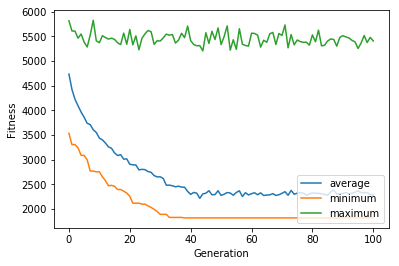

In [26]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")

('MEJOR RECORRIDO:', -1610)


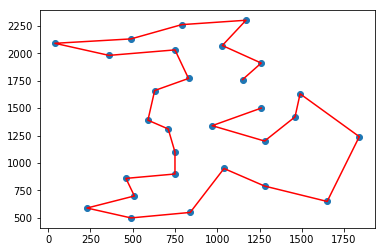

In [27]:
print("MEJOR RECORRIDO:",evaluacion(RECORRIDO_OPTIMO))
mostrar_recorrido(RECORRIDO_OPTIMO)